In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

- Ouverture image
- Convert image nuance de gris
- Determination du seuil

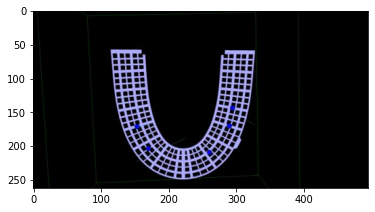

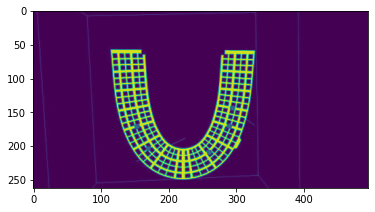

In [3]:
img = cv2.imread('./templates/test2.png')
# img = cv2.imread('./hania/templates/test2.png')[:,:,::-1]

plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

Garder seulement le premier contour : celui de l'appareil entier

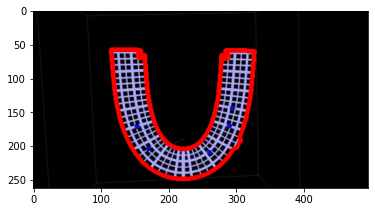

In [4]:
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]

approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)
plt.imshow(img)
plt.show()

- Calcule des moments de l'appareil dentaire à l'aide du contour
- Trouver le centre de graviter

(220, 155)


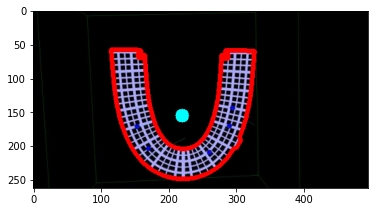

In [5]:
M = cv2.moments(contour)
x,y= 0,0
if M['m00'] != 0.0:
    x = int(M['m10']/M['m00'])
    y = int(M['m01']/M['m00'])
center = (x,y)

cv2.circle(img, center, radius=10, color=(0, 255, 255), thickness=-1)
print(center)
plt.imshow(img)
plt.show()

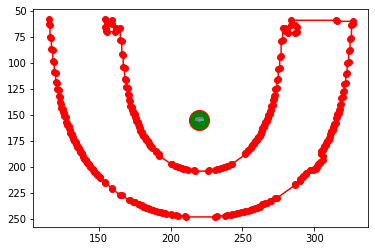

In [6]:
plt.gca().invert_yaxis()

a = list(center)
c = contour.reshape(351,2)
k = []
l = []
for i in c:
    k.append(i[0])
    l.append(i[1])
shape_contour = np.array([k,l])

plt.plot(shape_contour[0], shape_contour[1], '-or')
plt.plot(a[0], a[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
for i in range (1,180):
    θ = i * (2 * np.pi)/360
    plt.plot([a[0]-3*np.cos(θ),a[0]+np.cos(θ)],[a[1]-3*np.sin(θ),a[1]+np.sin(θ)], "-.")

$S = R_{-α}^{-1}\; Sx\; R_{-α} = R_α\;Sx\; R_{-α}$

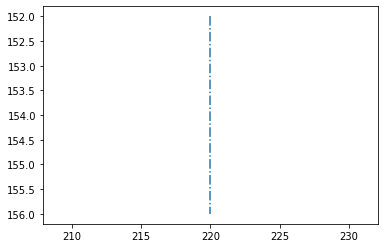

In [7]:
plt.gca().invert_yaxis()

def Rot(a, c):
    # return np.array([[np.cos(a), -np.sin(a), 0], [np.sin(a), np.cos(a), 0], [0, 0, 1]])
    # return np.array([[c[0]-3*np.cos(a), c[1]+np.sin(a)], [c[0]-3*np.sin(a), c[1]+np.cos(a)]])
    return np.array([[np.cos(a), np.sin(a)], [np.sin(a), np.cos(a)]])

Sx = np.array([[1, 0],[0,-1]])
θ = 90 * (2 * np.pi)/360

shape2 = Rot(θ, center) @ Sx @ Rot(-θ, center) @ shape_contour
# plt.plot(shape_contour[0], shape_contour[1], '-or')
plt.plot([a[0]-3*np.cos(θ),a[0]+np.cos(θ)],[a[1]-3*np.sin(θ),a[1]+np.sin(θ)],"-.")
# plt.plot(shape2[0], shape2[1], '-or')

# for i in range (1,180):
#     θ = i * (2 * np.pi)/360
#     shape2 = Rot(θ) @ Sx @ Rot(-θ) @ shape_contour
#     plt.plot(shape2[0], shape2[1], '-or')

Rogner l'image

In [8]:
print(np.amin(contours[0], 0))

[[115  58]]
